# Procesamiento digital de imágenes

# Práctica operadores puntuales e histogramas

### Importo Librerias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg

### Importo imagenes

In [3]:
imgToTest = imageio.imread('img/lena.png')
imgAerial = imageio.imread('img/aerial.jpg')

# Ejercicio 1

In [93]:
def mostrarImagen(img):
    plt.imshow(img, cmap='gray')
    plt.show()

def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

In [5]:
def compresionRangoDinamicoGrises(img):
    #ENTRADA: recibe una imagen
    #SALIDA: devuelve la imagen con el rango de grises comprimido
    
    maxV = calcNivelesGrises(img)-1

    c = 255/math.log(maxV+1)
    f = lambda v : c * math.log(v+1)

    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = f(imgCopy[x][y])
    return imgCopy
    

In [4]:
print(imgToTest)
print("----------")
print(compresionRangoDinamicoGrises(imgToTest))

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
----------
[[234 234 234 ... 236 232 223]
 [234 234 234 ... 236 232 223]
 [234 234 234 ... 236 232 223]
 ...
 [174 174 180 ... 214 212 211]
 [175 175 185 ... 214 214 215]
 [175 175 185 ... 214 214 215]]


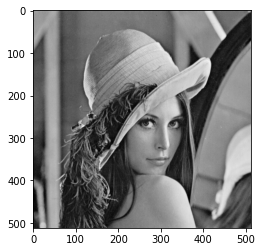

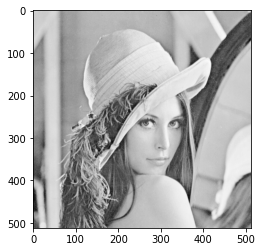

In [5]:
mostrarImagen(imgToTest)
mostrarImagen(compresionRangoDinamicoGrises(imgToTest))

# Ejercicio 2

In [11]:
def negativoDeImagen(img):
    #ENTRADA: recibe una imagen y la cantidad de niveles de grises
    #SALIDA: devuelve la imagen con el rango de grises comprimido

    L = util.calcNivelesGrises(img)
    f = lambda v : -v + L - 1

    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = f(imgCopy[x][y])

    return imgCopy
    

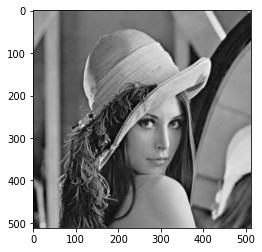

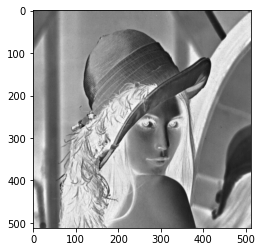

In [16]:
mostrarImagen(imgToTest)
mostrarImagen(negativoDeImagen(imgToTest))

# Ejercicio 3

In [59]:
def getHist(img):
    L = calcNivelesGrises(img)
    amountPixels = len(img)*len(img[0])
    values = L*[0]
    for x in range(len(img)):
        for y in range(len(img[0])):
            values[img[x][y]]+=1
    return np.array(values)/amountPixels

def plotHist(img):
    L = calcNivelesGrises(img)
    
    #FORMA MANUAL:
    #plt.bar(x=[x for x in range(256)],height=getHist(img))

    #FORMA RAPIDA
    plt.hist(np.reshape(img,-1), bins=L, density=True)
    plt.show()

def plotHistCumulative(img):
    L = calcNivelesGrises(img)
    plt.hist(np.reshape(img,-1), bins=L, density=True, cumulative=True)
    plt.show()

    

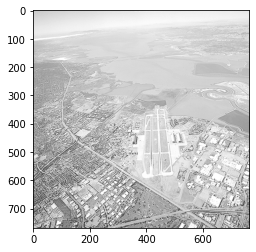

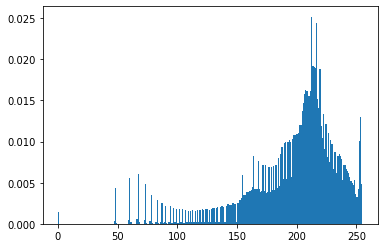

In [51]:
mostrarImagen(imgAerial)
plotHist(imgToTest)

# Ejercicio 4

In [86]:
def f2(v1X,v1Y,v2X,v2Y,v):
    pte = abs((v1Y-v2Y)/(v1X-v2X))
    b = v1Y - pte * v1X
    return pte * v + b

def f(v, L):
    r1, r2 = L/4, L*3/4
    s1, s2 = r1/2, r2
    f1, f3 = lambda v: v/2, lambda v: v*2
    #Tenemos que calcular las pendientes
    if v < r1:
        return f1(v)
    elif v < r2:
        return f2(r1, f1(r1), r2, f3(r2), v)
    else: 
        return f3(v)
    
def aumentoContraste(img):
    L = util.calcNivelesGrises(img)
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = int(f(img[x][y],L))
    return imgCopy

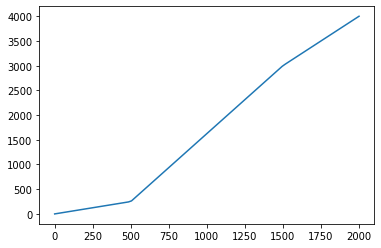

In [87]:
x = np.linspace(0,2000,100)
y = list(map(lambda z : f(z,2000), x))
plt.plot(x,y)
plt.show()

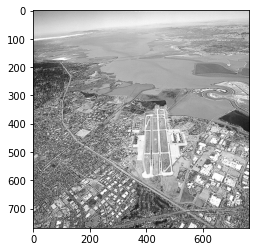

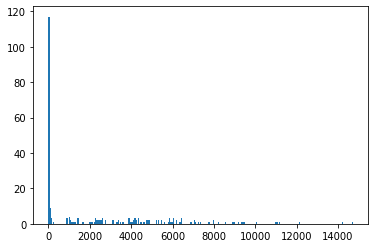

In [88]:
img2 = aumentoContraste(imgAerial)
mostrarImagen(img2)
plotHist(img2)

# Ejercicio 5

In [3]:
def umbral(img, threshold=None):
    L = calcNivelesGrises(img)
    if threshold == None:
        threshold = (L-1)/2
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            if(img[x][y] > threshold):
                imgCopy[x][y] = 1
            else: 
                imgCopy[x][y] = 0
    return imgCopy
    

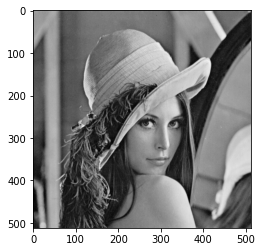

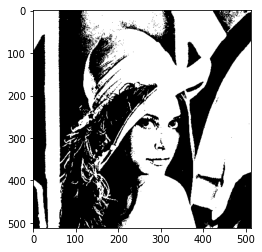

In [10]:
plt.imshow(imgToTest, cmap='gray')
plt.show()
plt.imshow(umbral(imgToTest), cmap='gray')
plt.show()

# Ejercicio 6

In [85]:
def get_mapping_histogram_ecualization_with_hist(hist):
    acumuladaProbabilidades = copy.deepcopy(hist)
    for i in range(1,len(acumuladaProbabilidades)):
        acumuladaProbabilidades[i] = acumuladaProbabilidades[i-1]+acumuladaProbabilidades[i]

    index1 = 0
    index2 = 0
    T = [0]*256

    for i in range(256):
        T[i] = 255*acumuladaProbabilidades[i]+0.5

    return T

def get_mapping_histogram_ecualization_with_img(img, acumuladaEsperada=None):    
    amountPixels = len(img)*len(img[0])
    
    p = getHist(img)

    return get_mapping_histogram_ecualization_with_hist(p)
    

In [87]:
def applyTransformation(img, T):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            imgCopy[i][j] = T[img[i][j]]
    return imgCopy

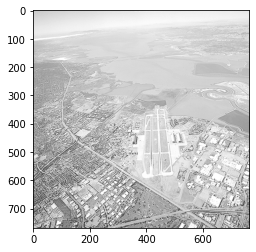

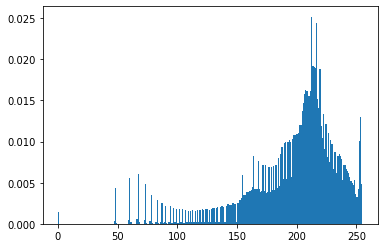

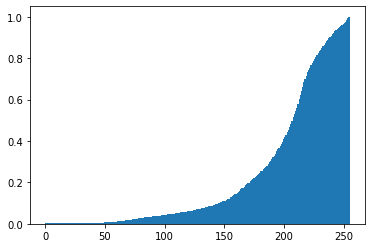

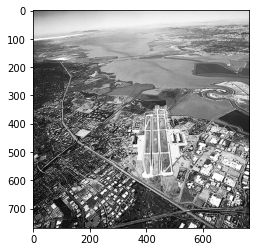

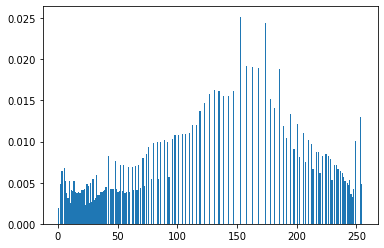

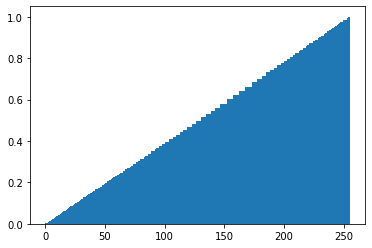

In [88]:
mostrarImagen(imgAerial)

plotHist(imgAerial)
plotHistCumulative(imgAerial)

T = get_mapping_histogram_ecualization_with_img(imgAerial)
imgHE = applyTransformation(imgAerial, T)

mostrarImagen(imgHE)

plotHist(imgHE)
plotHistCumulative(imgHE)


# Ejercicio 7

In [76]:
def getModifiedHistogram(hist, lamb=0, gamma=0):
    L = 256
    D = np.zeros((255, 256))
    for i in range(255):
        D[i][i] = -1
        D[i][i+1] = 1

    u = L*[1/L]
    I = np.identity(256)
    return linalg.inv((1+lamb) * I + np.dot(gamma, D.T @ D)) @ (hist+np.dot(lamb,u))
    

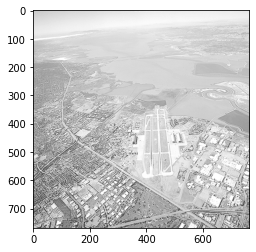

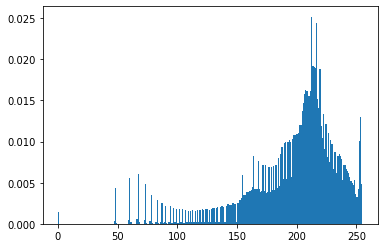

In [99]:
mostrarImagen(imgAerial)
plotHist(imgAerial)


## $\lambda = 1$ y $\gamma = 100$


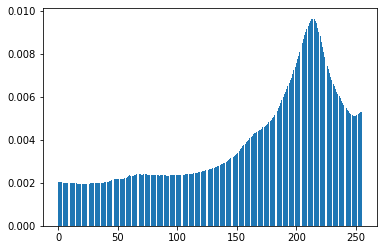

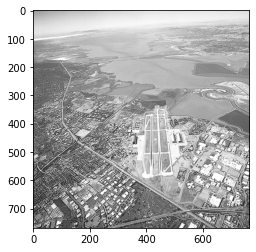

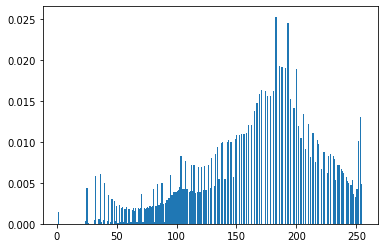

In [98]:
lamb = 1
gamma = 100
modifiedHist = getModifiedHistogram(getHist(imgAerial),lamb,gamma)
plt.bar(x=[x for x in range(256)],height=modifiedHist)
plt.show()

T = get_mapping_histogram_ecualization_with_hist(modifiedHist)
imgHE = applyTransformation(imgAerial, T)

mostrarImagen(imgHE)
plotHist(imgHE)

## $\lambda = 100$ y $\gamma = 1$

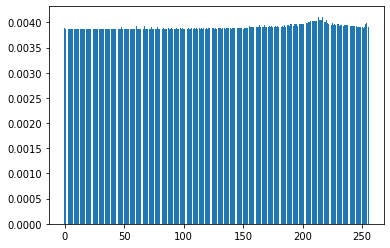

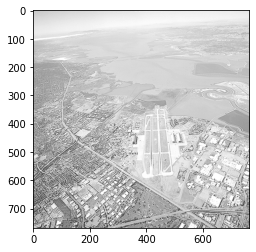

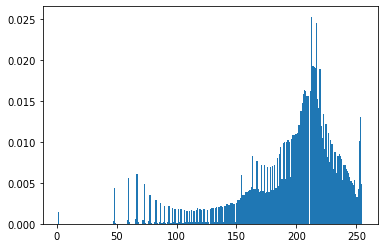

In [96]:
lamb = 100
gamma = 1
modifiedHist = getModifiedHistogram(getHist(imgAerial),lamb,gamma)
plt.bar(x=[x for x in range(256)],height=modifiedHist)
plt.show()

T = get_mapping_histogram_ecualization_with_hist(modifiedHist)
imgHE = applyTransformation(imgAerial, T)

mostrarImagen(imgHE)
plotHist(imgHE)

## $\lambda = 50$ y $\gamma = 50$

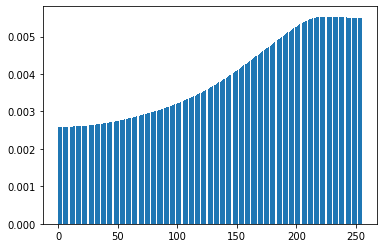

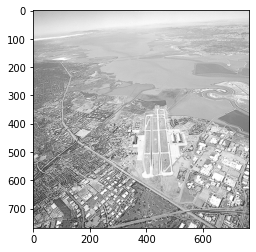

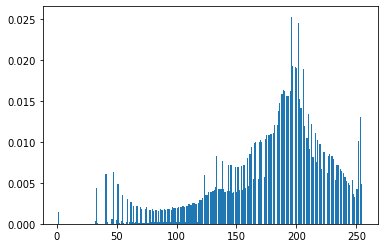

In [104]:
lamb = 1
gamma = 10000
modifiedHist = getModifiedHistogram(getHist(imgAerial),lamb,gamma)
plt.bar(x=[x for x in range(256)],height=modifiedHist)
plt.show()

T = get_mapping_histogram_ecualization_with_hist(modifiedHist)
imgHE = applyTransformation(imgAerial, T)

mostrarImagen(imgHE)
plotHist(imgHE)